### OvR 和 OvO

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [13]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='ovr',)
log_reg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [14]:
log_reg.score(X_test, y_test)

0.7894736842105263

In [15]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF0A0A', '#FFF59D', '#90CAD9'])
    
    plt.contourf(x0, x1, zz, linewidths=5, cmap=custom_cmap)

C:\Users\wh\AppData\Local\Temp\ipykernel_16128\812169963.py:14: UserWarning: linewidths is ignored by contourf
  plt.contourf(x0, x1, zz, linewidths=5, cmap=custom_cmap)


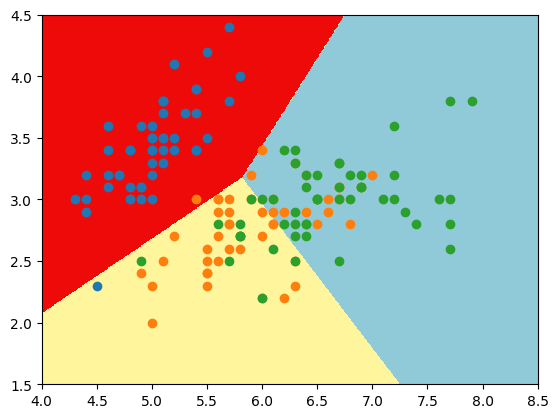

In [16]:
plot_decision_boundary(log_reg, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])
plt.scatter(X[y==2, 0], X[y==2,1])
plt.show()

In [10]:
log_reg2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_reg2.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [11]:
log_reg2.score(X_test, y_test)

0.7894736842105263

C:\Users\wh\AppData\Local\Temp\ipykernel_16128\812169963.py:14: UserWarning: linewidths is ignored by contourf
  plt.contourf(x0, x1, zz, linewidths=5, cmap=custom_cmap)


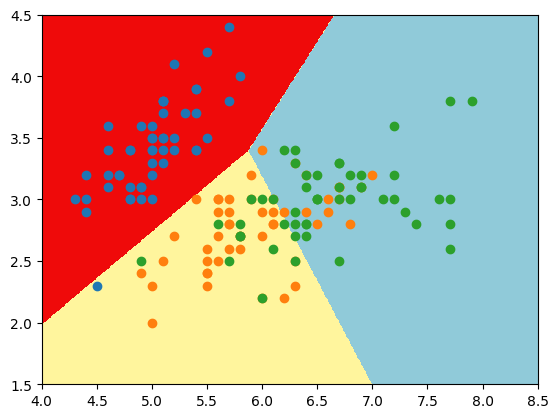

In [12]:
plot_decision_boundary(log_reg2, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])
plt.scatter(X[y==2, 0], X[y==2,1])
plt.show()

### 使用所有的数据

In [17]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [19]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

1.0

In [22]:
log_reg2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test)

1.0

### OvO and OvR

In [23]:
from sklearn.multiclass import OneVsOneClassifier

ovr = OneVsOneClassifier(log_reg)
ovr.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression())

In [24]:
ovr.score(X_test, y_test)

1.0

In [25]:
from sklearn.multiclass import OneVsRestClassifier

ovo = OneVsRestClassifier(log_reg)
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

0.9736842105263158